## Name: Shriya Bhat
## Registration no: 220968020
### Batch: DSE A1
## Week 11

---
### Use the Taxi v2 environment:
https://www.gymlibrary.dev/environments/toy_text/taxi/

#### Learn the policy using the following algorithms (Let parameters α = 0.4, γ=  0.9, Ɛ= 0.9):
- 1. SARSA
- 2. Expected SARSA
#### Plot the episode vs. reward graph, compare, and comment on the performance of the three algorithms for 2000 episodes.
---

Training SARSA agent...
Episode 1000: Avg Return = -337.05, Best = -337.05, Epsilon = 0.100

Training Expected SARSA agent...
Episode 1000: Avg Return = -241.42, Best = -241.42, Epsilon = 0.100


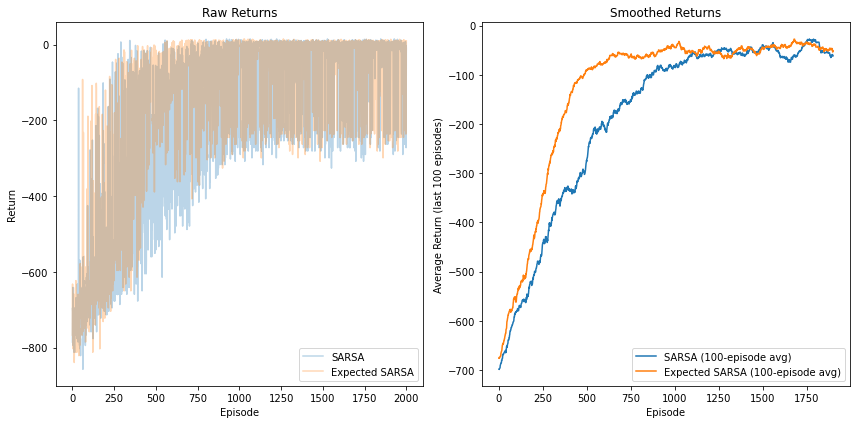


Visualizing Expected SARSA agent...
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Action: 4, Reward: -1
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Action: 3, Reward: -1
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Action: 3, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | 

In [6]:
import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

class RLAgent:
    def __init__(self, env, learning_rate=0.4, initial_epsilon=0.9, epsilon_decay=0.00005, 
                 final_epsilon=0.1, discount_factor=0.9, algorithm='sarsa'):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon
        self.algorithm = algorithm
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

    def get_action(self, obs) -> int:
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_values[obs])

    def update(self, obs, action, reward, terminated, next_obs, next_action=None):
        if self.algorithm == 'sarsa':
            # SARSA update
            if not terminated:
                td_target = reward + self.discount_factor * self.q_values[next_obs][next_action]
                td_error = td_target - self.q_values[obs][action]
                self.q_values[obs][action] += self.learning_rate * td_error
        elif self.algorithm == 'expected_sarsa':
            # Expected SARSA update
            if not terminated:
                policy = np.ones(self.env.action_space.n) * self.epsilon / self.env.action_space.n
                best_action = np.argmax(self.q_values[next_obs])
                policy[best_action] += (1 - self.epsilon)
                expected_value = np.sum(policy * self.q_values[next_obs])
                td_target = reward + self.discount_factor * expected_value
                td_error = td_target - self.q_values[obs][action]
                self.q_values[obs][action] += self.learning_rate * td_error
        else:
            raise ValueError("Unknown algorithm")

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

def train_agent(agent, env, episodes, eval_interval=1000):
    returns = []
    best_reward = -np.inf
    
    for episode in range(episodes):
        obs, _ = env.reset()
        terminated = truncated = False
        total_reward = 0
        action = agent.get_action(obs)
        
        while not terminated and not truncated:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_action = agent.get_action(next_obs)
            agent.update(obs, action, reward, terminated, next_obs, next_action)
            
            obs = next_obs
            action = next_action
            total_reward += reward
        
        agent.decay_epsilon()
        returns.append(total_reward)
        
        if episode % eval_interval == 0 and episode > 0:
            avg_return = np.mean(returns[max(0, episode - eval_interval):episode])
            best_reward = max(avg_return, best_reward)
            print(f"Episode {episode}: Avg Return = {avg_return:.2f}, Best = {best_reward:.2f}, Epsilon = {agent.epsilon:.3f}")
    
    return returns

def plot_comparison(sarsa_returns, expected_sarsa_returns, window=100):
    plt.figure(figsize=(12, 6))
    
    # Plot raw returns
    plt.subplot(1, 2, 1)
    plt.plot(sarsa_returns, alpha=0.3, label='SARSA')
    plt.plot(expected_sarsa_returns, alpha=0.3, label='Expected SARSA')
    plt.title('Raw Returns')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.legend()
    
    # Plot smoothed returns
    plt.subplot(1, 2, 2)
    plt.plot(np.convolve(sarsa_returns, np.ones(window)/window, mode='valid'), 
             label=f'SARSA ({window}-episode avg)')
    plt.plot(np.convolve(expected_sarsa_returns, np.ones(window)/window, mode='valid'), 
             label=f'Expected SARSA ({window}-episode avg)')
    plt.title('Smoothed Returns')
    plt.xlabel('Episode')
    plt.ylabel(f'Average Return (last {window} episodes)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def visualize_agent(agent, env, episodes=1):
    agent.epsilon = 0  # Disable exploration
    for _ in range(episodes):
        obs, _ = env.reset()
        terminated = truncated = False
        total_reward = 0
        
        while not terminated and not truncated:
            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, _ = env.step(action)
            print(env.render())
            print(f"Action: {action}, Reward: {reward}")
            obs = next_obs
            total_reward += reward
        
        print(f"Episode complete! Total reward: {total_reward}")

# Main execution
if __name__ == "__main__":
    # Initialize environment
    env = gym.make('Taxi-v3')
    
    # Hyperparameters
    episodes = 2000
    learning_rate = 0.4
    discount_factor = 0.9
    initial_epsilon = 0.9
    final_epsilon = 0.1
    epsilon_decay = (initial_epsilon - final_epsilon) / (episodes / 2)  # Linear decay
    
    # Train SARSA agent
    print("Training SARSA agent...")
    sarsa_agent = RLAgent(env, learning_rate, initial_epsilon, epsilon_decay, 
                         final_epsilon, discount_factor, algorithm='sarsa')
    sarsa_returns = train_agent(sarsa_agent, env, episodes)
    
    # Train Expected SARSA agent
    print("\nTraining Expected SARSA agent...")
    expected_sarsa_agent = RLAgent(env, learning_rate, initial_epsilon, epsilon_decay, 
                                 final_epsilon, discount_factor, algorithm='expected_sarsa')
    expected_sarsa_returns = train_agent(expected_sarsa_agent, env, episodes)
    
    # Plot comparison
    plot_comparison(sarsa_returns, expected_sarsa_returns)
    
    # Visualize the better performing agent
    if np.mean(sarsa_returns[-100:]) > np.mean(expected_sarsa_returns[-100:]):
        print("\nVisualizing SARSA agent...")
        visualize_agent(sarsa_agent, gym.make('Taxi-v3', render_mode='ansi'))
    else:
        print("\nVisualizing Expected SARSA agent...")
        visualize_agent(expected_sarsa_agent, gym.make('Taxi-v3', render_mode='ansi'))